In [7]:
import pandas as pd
import tensorflow as tf
import os
import numpy as np

In [79]:
base_data_path = os.path.join('/Users/pgaggar/Python/credit-worthiness/data')
app_csv = os.path.join(base_data_path, 'applicant.csv')
loan_csv = os.path.join(base_data_path, 'loan.csv')

In [80]:
applicant_df = pd.read_csv(app_csv, index_col='applicant_id')
loan_df = pd.read_csv(loan_csv, index_col='applicant_id')

In [81]:
combined_df = applicant_df.join(loan_df)

In [82]:
applicant_df.shape, loan_df.shape, combined_df.shape

((1000, 14), (1000, 12), (1000, 26))

In [83]:
combined_df.head()

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
applicant_id,,,,,,,,,,,,,,,,,,,,,
1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,...,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,...,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,...,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,...,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,...,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [84]:
col = 'Principal_loan_amount'
combined_df[col].corr(combined_df['high_risk_applicant'])

0.15473864110152305

In [85]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

ohe_gender = OneHotEncoder(sparse=False)
col = 'Marital_status'
data = combined_df[col].values.reshape(-1, 1)
ohe_gender.fit_transform(data)

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

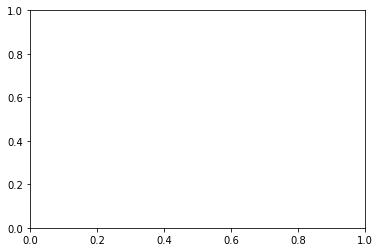

In [157]:
import matplotlib.pyplot as plt

ax = plt.subplot(111)

field = 'Purpose'

labels = combined_df[field].unique()

x_axis = np.array(range(len(labels)))

filtered_df_low_risk = combined_df[combined_df['high_risk_applicant'] == 0]

plot_data_lr = filtered_df_low_risk[field].value_counts()

ax.bar(x_axis - 0.1, plot_data_lr.values / sum(plot_data_lr.values), width = 0.2, align='center', label='Low Risk')

filtered_df_high_risk = combined_df[combined_df['high_risk_applicant'] == 1]

plot_data_hr = filtered_df_high_risk[field].value_counts()

ax.bar(x_axis + 0.1, plot_data_hr.values / sum(plot_data_hr.values), width = 0.2, align='center', label='High Risk')


ax.set_ylabel('Number of Applicants')
ax.set_title('Applicants by {}'.format(field))
ax.set_xticks(x_axis)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

<AxesSubplot:>

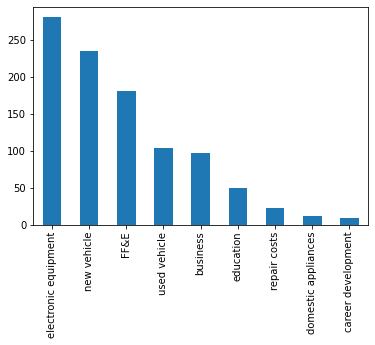

In [163]:
combined_df['Purpose'].value_counts().plot(kind='bar')

In [166]:
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit['Primary_applicant_age_in_years'], interval, labels=cats)

In [204]:
combined_df['Savings_account_balance'].unique()

array(['no_inf', 'Low', 'High', 'Very high', 'Medium'], dtype=object)

In [206]:
df_credit = combined_df

In [207]:
df_credit['Savings_account_balance'] = df_credit['Savings_account_balance'].fillna('no_inf')

df_credit = df_credit.merge(pd.get_dummies(df_credit.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)

df_credit = df_credit.merge(pd.get_dummies(df_credit.Gender, drop_first=True, prefix='Gender'), left_index=True, right_index=True)

df_credit = df_credit.merge(pd.get_dummies(df_credit.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)

df_credit = df_credit.merge(pd.get_dummies(df_credit.Savings_account_balance, drop_first=True, prefix='Savings'), left_index=True, right_index=True)

df_credit = df_credit.merge(pd.get_dummies(df_credit.Age_cat, drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

df_credit = df_credit.merge(pd.get_dummies(df_credit.Marital_status, drop_first=True, prefix='Marital_status'), left_index=True, right_index=True)

df_credit = df_credit.merge(pd.get_dummies(df_credit.Employment_status, drop_first=True, prefix='Employment_status'), left_index=True, right_index=True)

df_credit = df_credit.merge(pd.get_dummies(df_credit.Has_been_employed_for_at_least, drop_first=True, prefix='At Least Employed'), left_index=True, right_index=True)

df_credit = df_credit.merge(pd.get_dummies(df_credit.Has_been_employed_for_at_most, drop_first=True, prefix='At Most Employed'), left_index=True, right_index=True)

df_credit = df_credit.merge(pd.get_dummies(df_credit.Property, drop_first=True, prefix='Property'), left_index=True, right_index=True)


In [208]:
del df_credit["Purpose"]
del df_credit["Gender"]
del df_credit["Housing"]
del df_credit["Primary_applicant_age_in_years"]
del df_credit["Savings_account_balance"]
del df_credit["Age_cat"]
del df_credit["Marital_status"]
del df_credit["Employment_status"]
del df_credit["Has_been_employed_for_at_least"]
del df_credit["Has_been_employed_for_at_most"]
del df_credit["Telephone"]
del df_credit["loan_application_id"]
del df_credit["Property"]
del df_credit["Balance_in_existing_bank_account_(lower_limit_of_bucket)"]
del df_credit["Balance_in_existing_bank_account_(upper_limit_of_bucket)"]

In [209]:
df_credit.head()

,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,...,Employment_status_unemployed / unskilled - non-resident,Employment_status_unskilled - resident,At Least Employed_1 year,At Least Employed_4 years,At Least Employed_7 years,At Most Employed_1 year,At Most Employed_4 years,At Most Employed_7 years,Property_car or other,Property_real estate
applicant_id,,,,,,,,,,,,,,,,,,,,,
1469590,1,4,1,6,1169000,4,0,0,NaN,2,...,0,0,0,0,1,0,0,0,0,1
1203873,1,2,1,48,5951000,2,0,0,NaN,1,...,0,0,1,0,0,0,1,0,0,1
1432761,2,3,1,12,2096000,2,0,0,NaN,1,...,0,1,0,1,0,0,0,1,0,1
1207582,2,4,1,42,7882000,2,0,1,NaN,1,...,0,0,0,1,0,0,0,1,0,0
1674436,2,4,1,24,4870000,3,0,0,NaN,2,...,0,0,1,0,0,0,1,0,0,0


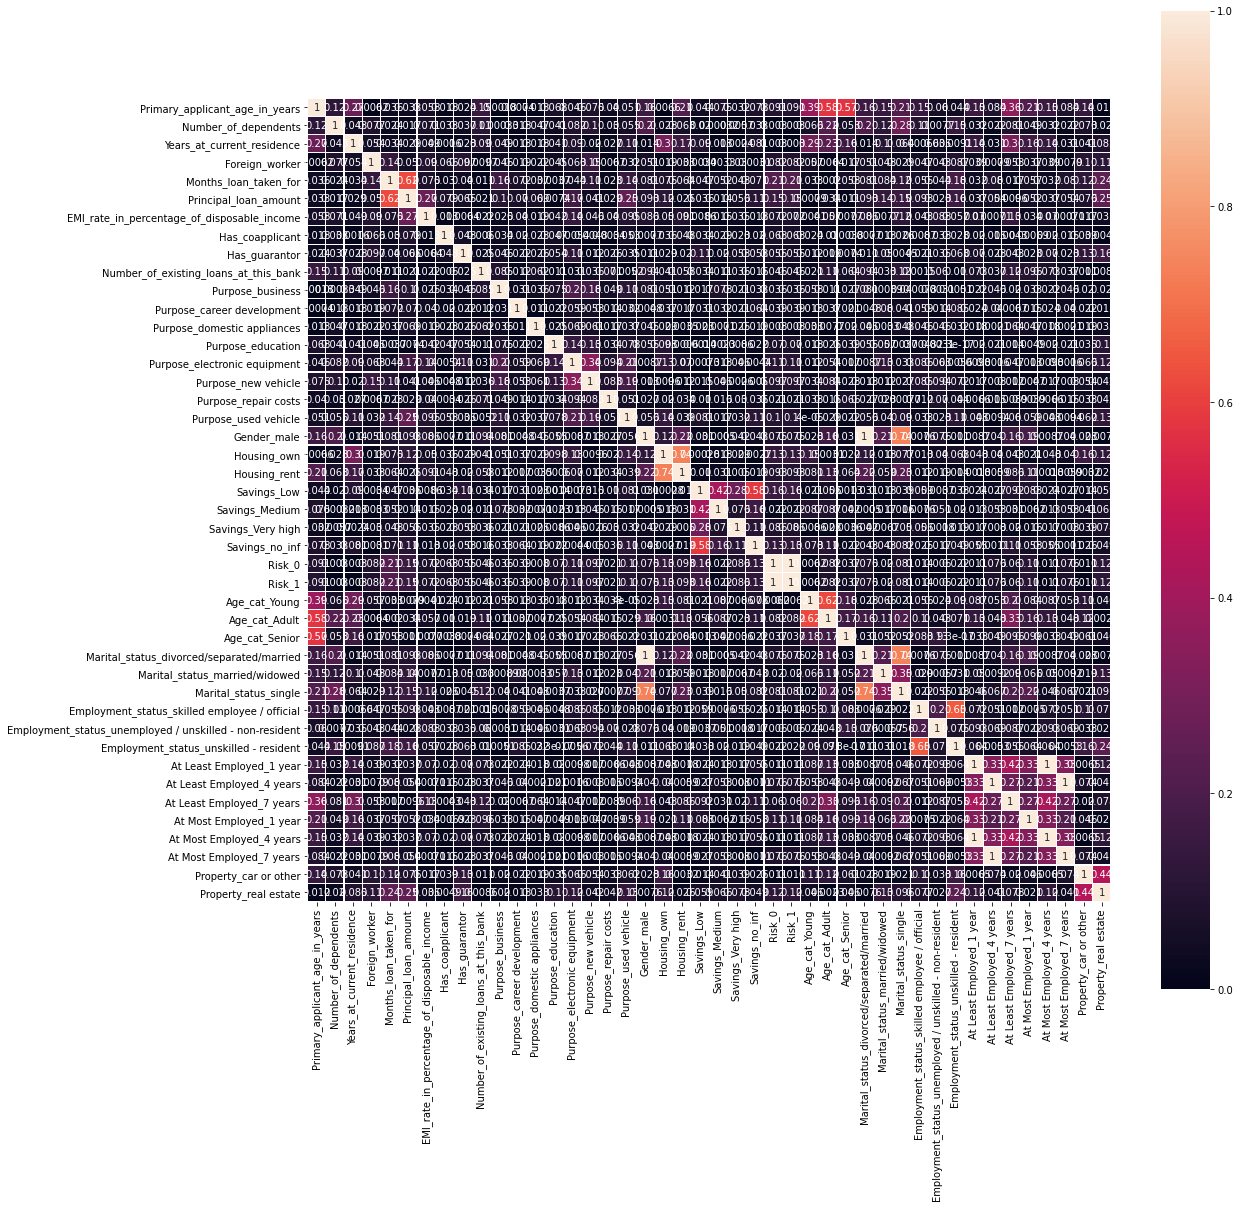

In [203]:
plt.figure(figsize=(18,18))
sns.heatmap(abs(df_credit.corr()),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [201]:
correlation = df_credit.corr()

In [210]:
df_credit.shape

(1000, 44)

In [211]:
combined_df['Loan_history'].unique()

array(['critical/pending loans at other banks',
       'existing loans paid back duly till now',
       'delay in paying off loans in the past',
       'no loans taken/all loans paid back duly',
       'all loans at this bank paid back duly'], dtype=object)